In [1]:
import pandas as pd
import numpy as np
import os
import sys
import scanpy as sc


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/adaptive_sampling/data/tabula_sapiens_filtered.h5ad"
pdf = sc.read_h5ad(fpath)

sc.pp.normalize_total(pdf, target_sum=1e4)
sc.pp.log1p(pdf)

pdf

AnnData object with n_obs × n_vars = 27346 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'celltype', 'record_id', 'cell_id'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'log1p', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

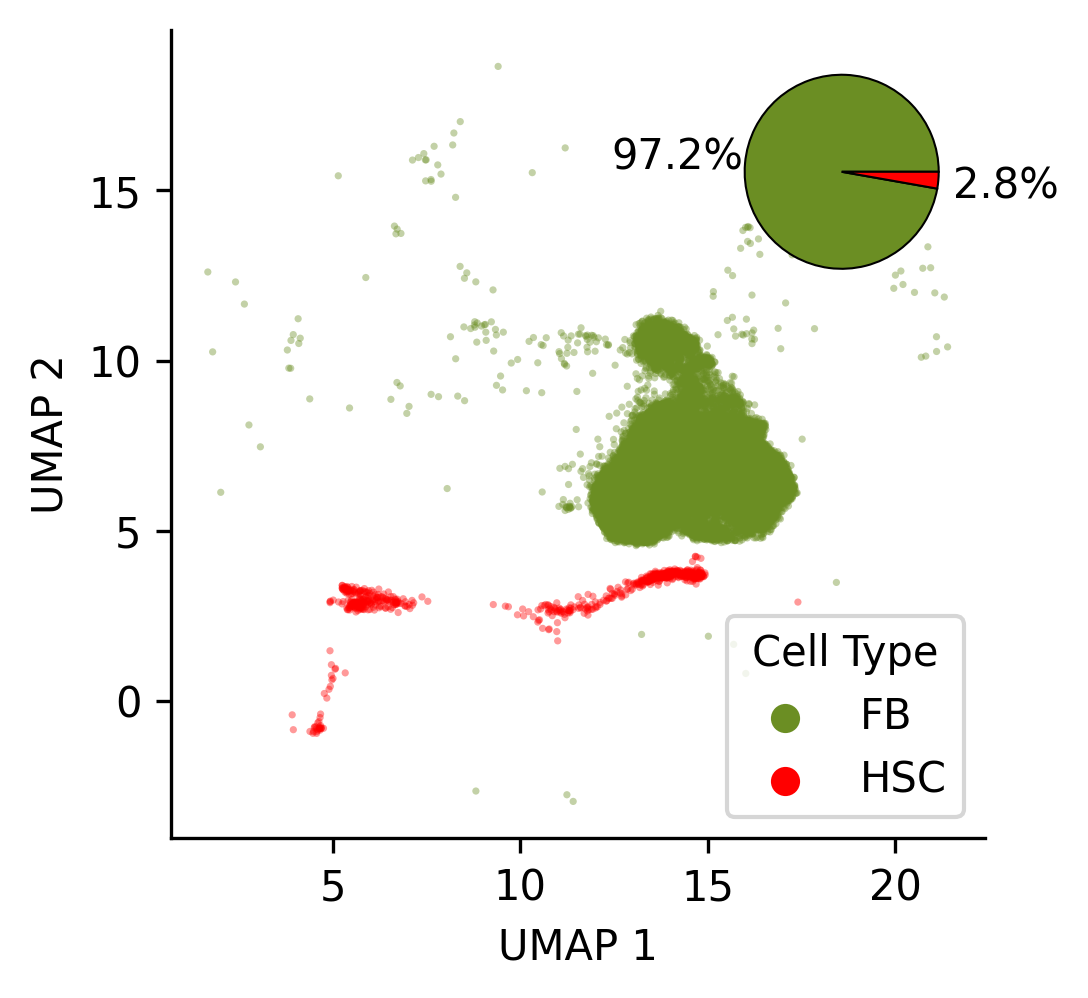

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.5, 3.5

cellmap = {
    'fibroblast' : 'FB',
    'hematopoietic stem cell' : 'HSC',
}

pdf.obs['celltype'] = pdf.obs['cell_ontology_class'].map(cellmap)

sns.scatterplot(x=pdf.obsm['X_umap'][:,0],
                y=pdf.obsm['X_umap'][:,1],
                s=3,
                ec='none',
                hue=pdf.obs['celltype'],
                palette=['olivedrab', 'r'],
                alpha=0.4)

ax = plt.gca()
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

sns.move_legend(ax,
                loc='lower right',
                frameon=True,
                title='Cell Type',)
                # bbox_to_anchor=(1.4, 1))

# build pie_chart
axin = inset_axes(ax, 
                  width="30%", 
                  height="30%", 
                  loc='upper right', 
                  borderpad=0.5)

axin.pie(pdf.obs['celltype'].value_counts(),
         colors=['olivedrab', 'r'],
         autopct='%1.1f%%',
         wedgeprops={"edgecolor":"k",'linewidth': 0.5},
         pctdistance=1.7)

sns.despine()

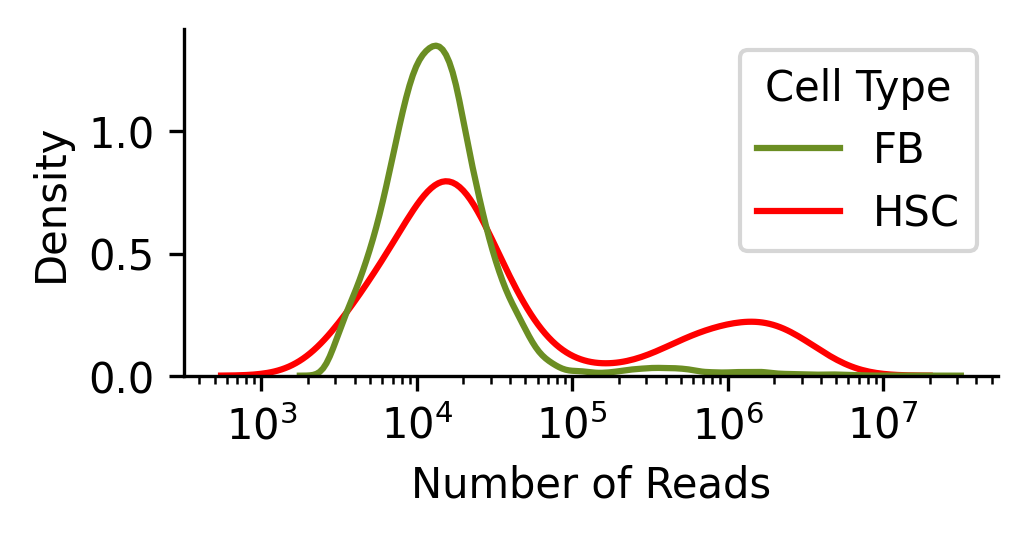

In [4]:
# distribution of raw counts

raw_counts_sum = np.ravel(pdf.layers['raw_counts'].sum(axis=1))
pdf.obs['raw_counts_sum'] = raw_counts_sum

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.5, 1.5

sns.kdeplot(data=pdf.obs,
             x='raw_counts_sum',
             # bins=10,
             common_norm=False,
             hue='celltype',
             log_scale=True,
             palette=['olivedrab', 'r'])

ax = plt.gca()

sns.move_legend(ax,
                loc='upper right',
                frameon=True,
                title='Cell Type',)

ax.set_xlabel("Number of Reads")
ax.set_ylabel("Density")

sns.despine()

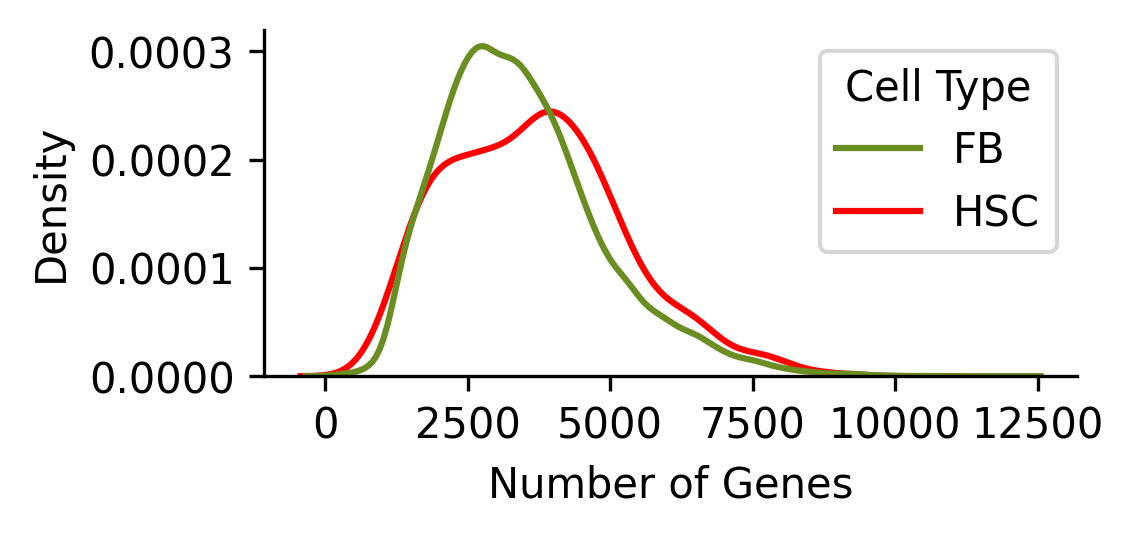

In [5]:
# distribution of number of expressed genes

n_genes_sum = np.ravel(pdf.layers['raw_counts'].astype(bool).sum(axis=1))
pdf.obs['n_genes_sum'] = n_genes_sum

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3.5, 1.5

sns.kdeplot(data=pdf.obs,
             x='n_genes_sum',
             # bins=10,
             common_norm=False,
             hue='celltype',
             # log_scale=True,
             palette=['olivedrab', 'r'])

ax = plt.gca()

sns.move_legend(ax,
                loc='upper right',
                frameon=True,
                title='Cell Type',)

ax.set_xlabel("Number of Genes")
ax.set_ylabel("Density")
sns.despine()

In [6]:
pdf.obs.head()

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender,celltype,record_id,cell_id,raw_counts_sum,n_genes_sum
AAAGAACTCCTACCGT_TSP6_Trachea_NA_10X_1_1,Trachea,10X,TSP6,nan,17016.0,4353,fibroblast,fibroblast,True,stromal,male,FB,1,FB_1,17089.0,4378
AAAGTGACATCATGAC_TSP6_Trachea_NA_10X_1_1,Trachea,10X,TSP6,nan,8717.0,2673,fibroblast,fibroblast,True,stromal,male,FB,2,FB_2,8964.0,2713
AACCACACACTCCGGA_TSP6_Trachea_NA_10X_1_1,Trachea,10X,TSP6,nan,14208.0,3610,fibroblast,fibroblast,True,stromal,male,FB,3,FB_3,14306.0,3625
AACGGGACAGAGATGC_TSP6_Trachea_NA_10X_1_1,Trachea,10X,TSP6,nan,5770.0,2117,fibroblast,fibroblast,True,stromal,male,FB,4,FB_4,6100.0,2160
AACGTCACACGCGCAT_TSP6_Trachea_NA_10X_1_1,Trachea,10X,TSP6,nan,16684.0,3954,fibroblast,fibroblast,True,stromal,male,FB,5,FB_5,16759.0,3970


In [7]:
key = 'celltype'
# get marker genes
sc.tl.rank_genes_groups(pdf, 
                        groupby=key,
                        use_raw=False,
                        method='wilcoxon',
                        key_added=key,
                        corr_method='benjamini-hochberg')

deg = sc.get.rank_genes_groups_df(pdf, 
                                  group='HSC',
                                  key=key)

deg.head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,GMFG,44.496376,8.757190,0.0,0.0
1,ARHGDIB,44.373741,4.412849,0.0,0.0
2,VAMP8,41.570374,6.812530,0.0,0.0
3,RAC2,40.247749,11.788810,0.0,0.0
4,CD74,40.044231,4.569715,0.0,0.0


In [8]:
hsc = pdf[(pdf.obs['celltype'] == 'HSC')]
fib = pdf[(pdf.obs['celltype'] != 'HSC')]
print('done')

done


In [30]:
top_n = 1000
alpha = 0.01
lfct = 1
perc_t = 0.5

def getpercent(gene, adata):
    """A function to get the percentage of the cells
    that express a given gene """
    t = adata[:, gene].layers['raw_counts'].astype(bool)
    return t.sum() / t.shape[0]

sig = deg.copy()
sig = sig[sig['pvals_adj'] <= alpha]
sig = sig[(sig['logfoldchanges'] > lfct)]
sig = sig.sort_values(by='logfoldchanges', ascending=False,)
sig = sig.head(top_n)

sig['perc'] = sig['names'].apply(lambda x: getpercent(x, hsc))
sig = sig[(sig['perc'] > perc_t)]
print(f"{sig.shape=}")
sig = sig.sort_values(by='perc', ascending=False,)

outpath = f"/nfs/turbo/umms-indikar/shared/projects/adaptive_sampling/data/top_HSC_markers.csv"
sig.to_csv(outpath, index=False)

sig.head()

sig.shape=(103, 6)


,names,scores,logfoldchanges,pvals,pvals_adj,perc
1,ARHGDIB,44.373741,4.412849,0.000000e+00,0.000000e+00,0.978947
0,GMFG,44.496376,8.757190,0.000000e+00,0.000000e+00,0.952632
4,CD74,40.044231,4.569715,0.000000e+00,0.000000e+00,0.944737
2,VAMP8,41.570374,6.812530,0.000000e+00,0.000000e+00,0.898684
11,STMN1,37.602573,4.165506,1.951229e-309,1.148689e-306,0.871053


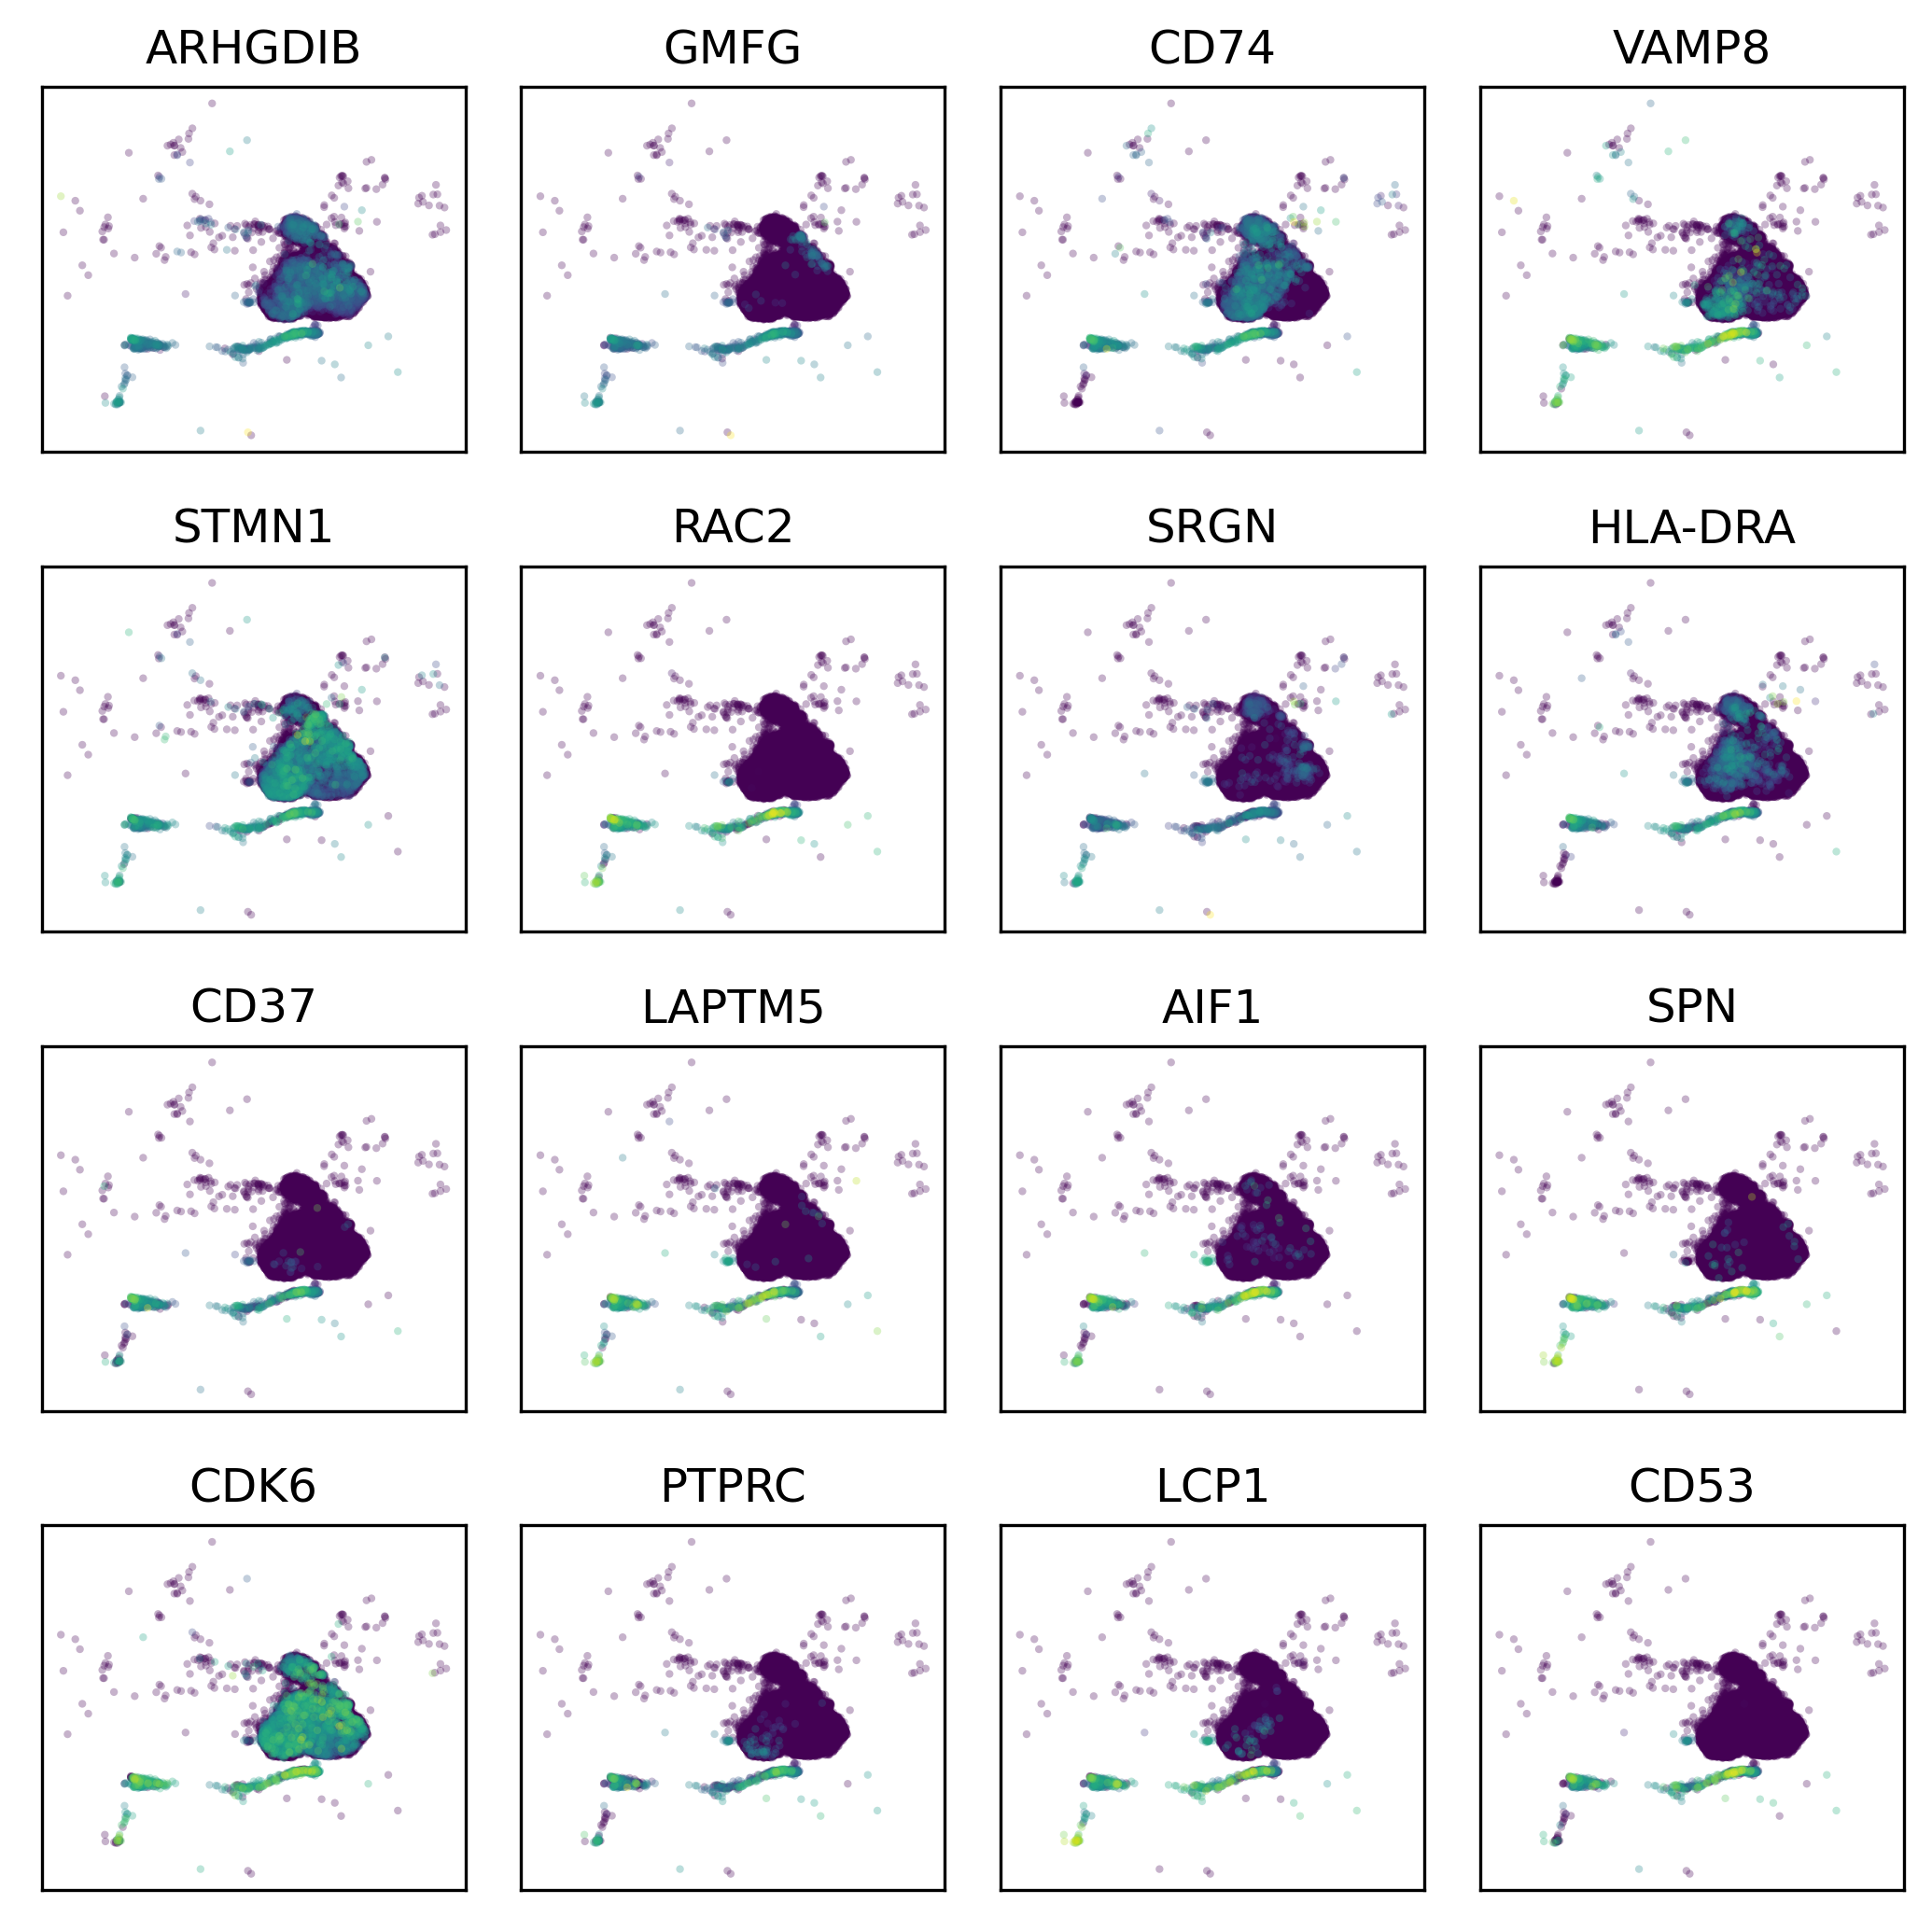

In [36]:
label_genes = sig.head(16)['names'].to_list()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 7
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()

for i, g in enumerate(label_genes):
    v = np.ravel(pdf[:, [g]].X.todense())
    order = np.argsort(v)

    axs[i].scatter(x=pdf.obsm['X_umap'][:,0][order], 
                   y=pdf.obsm['X_umap'][:,1][order],
                   c=v[order],
                   s=4,
                   alpha=0.3,
                   ec='none')
    
    axs[i].set_xticks([])
    axs[i].set_yticks([])

    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].set_title(g)

plt.tight_layout()

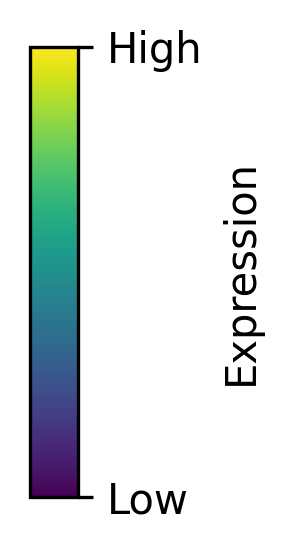

In [37]:
# def makeColorbar(cmap, width, hieght, title, orientation, tickLabels):
#     a = np.array([[0,1]])
#     plt.figure(figsize=(width, hieght))
#     img = plt.imshow(a, cmap=cmap)
#     plt.gca().set_visible(False)
#     cax = plt.axes([0.1, 0.2, 0.8, 0.6])
#     ticks = np.linspace(0,1 , len(tickLabels))
#     cbar = plt.colorbar(orientation=orientation, 
#                         cax=cax, 
#                         label=title,
#                         ticks=ticks)

#     if orientation == 'vertical':
#         cbar.ax.set_yticklabels(tickLabels)
#     else:
#         cbar.ax.set_xticklabels(tickLabels)



# makeColorbar('viridis', 0.2, 2.5, "Expression", "vertical", ['Low', 'High'])